In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import solve_ivp
import perlin
import palletes

plt.rcParams['agg.path.chunksize'] = 10000

rng = np.random.default_rng()

In [2]:
pi = np.pi
sqrt3 = np.sqrt(3)
sqrt2 = np.sqrt(2)
degree = pi/180

x_1 = np.array([1,0])
x_2 = np.array([-0.5,sqrt3/2])
x_3 = -x_1 - x_2

def unit_vector(angle):
    return np.array([np.cos(angle),np.sin(angle)])

In [3]:
def truchet_hex_a(vertex,hex_radius,**kwargs):
    
    hexagon = mpl.patches.RegularPolygon(vertex,numVertices=6,radius=hex_radius,fill=False,
                                        **kwargs)

    upper_right = mpl.patches.Arc(vertex + hex_radius*unit_vector(30*degree),
                              width=hex_radius,
                              height=hex_radius,
                              theta1= 150-1,
                              theta2= 150+121,
                                **kwargs)
    upper_left =  mpl.patches.Arc(vertex+hex_radius*unit_vector(150*degree),
                              width=hex_radius,
                              height=hex_radius,
                              theta1= 270-1,
                              theta2= 270+121,
                                 **kwargs)

    bottom =  mpl.patches.Arc(vertex+hex_radius*unit_vector(270*degree),
                              width=hex_radius,
                              height=hex_radius,
                              theta1= 30-1,
                              theta2= 30+121,
                             **kwargs)
    return hexagon, upper_right, upper_left, bottom

def truchet_hex_b(vertex,hex_radius,**kwargs):
    
    hexagon = mpl.patches.RegularPolygon(vertex,numVertices=6,radius=hex_radius,fill=False,**kwargs)
    
    top = mpl.patches.Arc(vertex + hex_radius*unit_vector(90*degree),
                                  width=hex_radius,
                                  height=hex_radius,
                                  theta1= 210-1,
                                  theta2= 210+121,**kwargs)
    bottom_left =  mpl.patches.Arc(vertex + hex_radius*unit_vector(210*degree),
                                  width=hex_radius,
                                  height=hex_radius,
                                  theta1= 210+120-1,
                                  theta2= 90+1,**kwargs)

    bottom_right =  mpl.patches.Arc(vertex + hex_radius*unit_vector(-30*degree),
                                  width=hex_radius,
                                  height=hex_radius,
                                  theta1= 90-1,
                                  theta2= 90+121,**kwargs)
    return hexagon, top, bottom_left, bottom_right

18.186533479473212


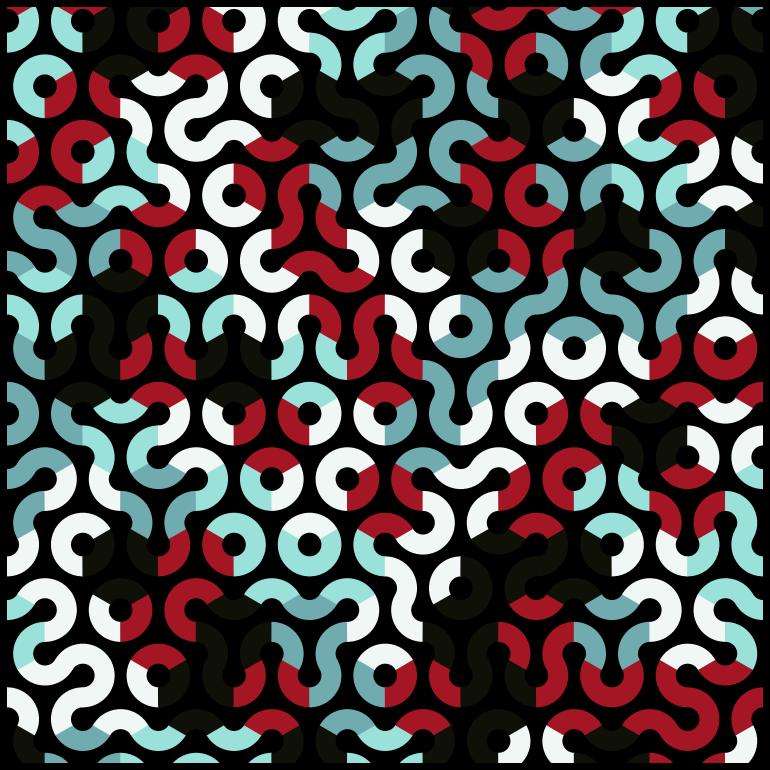

In [4]:
n_side = 10

background_color = 'k'
pallete = palletes.ice_cream_shop

aspect_ratio = 1/1 #width/height

line_width = 20

vertices = [i*x_1 + j*x_2 for i in range(n_side+1) for j in range(2*i + 2)]
vertices = vertices + [i*x_1 + j*x_2 for i in range(n_side+1,2*n_side +1) for j in range(2*(i-n_side),2*n_side+2)]
vertices = np.array(vertices)

radius = 1/sqrt3

fig, ax = plt.subplots(figsize=(10.8,10.8/aspect_ratio))

print(vertices[:,1].max())
for vertex in vertices:
    
    tile = rng.choice([truchet_hex_a,truchet_hex_b])
    
    color = rng.choice(pallete)

    for patch in tile(vertex,radius,lw=line_width,ec=color)[1:]:
        
        ax.add_patch(patch)
#ax.axis('equal')
ax.axis('off')
ax.set_xlim(0,vertices[:,0].max())
ax.set_ylim(0,vertices[:,0].max()/aspect_ratio)
ax.set_facecolor(background_color)
fig.set_facecolor(background_color)
fig.tight_layout()
fig.savefig('truchet_hex_square.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.show()